### ToDo
* changing resource state 
* changing setup for each op 
    * may not required as you have the current operation with the req setup
    * and we do not consider setup times.
* monitoring the basics

In [1]:
from plan.GifflerThompson import GifflerThompson
from factory.Operation import Operation
# Beispielhafte Datenstruktur
jobs_data = [
    ['p1', 1, 'a1', 17, 2],
    ['p1', 2, 'a2', 30, 4],
    ['p1', 3, 'a3', 14, 4],
    ['p1', 4, 'a4', 15, 5],
    ['p1', 5, 'a5', 25, -1],
    ['p2', 1, 'a1', 13, 3],
    ['p2', 2, 'a3', 15, 3],
    ['p2', 3, 'a2', 10, 4],
    ['p2', 4, 'a6', 20, -1],
]

# Maschinenpools definieren
# id, number, tools 
machine_pools_data = [
    ['a1', 2, [1,2,3]],
    ['a2', 1, [1,2,3]],
    ['a3', 2, [1,2,3]],
    ['a4', 1, [1,2,3]],
    ['a5', 1, [1,2,3]],
    ['a6', 1, [1,2,3]],
]

# Konvertiere die jobs_data in Operation-Objekte
operations = [Operation(*data) for data in jobs_data]


# Define a priority rule
def calculate_dynamic_priority(operation) -> int:
    # Priorität basierend auf der geplanten Startzeit der Vorgängeraufgaben
    if not operation.predecessor_operations:
        return operation.plan_start if operation.plan_start is not None else 0
    else:
        return max(pred.plan_start for pred in operation.predecessor_operations) + operation.duration
    

# define an inference rule    
def inference(operation: Operation) -> int:
    return operation.duration

gt = GifflerThompson(calculate_dynamic_priority, inference)
# Führe den Giffler Thompson Algorithmus aus
result_schedule = gt.giffen_thompson(operations, machine_pools_data)

# Ausgabe des Ergebnisses
for entry in result_schedule:
    print(entry)

Operation(job_id='p1', operation_id=1, plan_machine_id='a1_0', duration=17, successor=2, plan_start=0, plan_end=17)
Operation(job_id='p1', operation_id=3, plan_machine_id='a3_0', duration=14, successor=4, plan_start=0, plan_end=14)
Operation(job_id='p2', operation_id=1, plan_machine_id='a1_1', duration=13, successor=3, plan_start=0, plan_end=13)
Operation(job_id='p2', operation_id=2, plan_machine_id='a3_1', duration=15, successor=3, plan_start=0, plan_end=15)
Operation(job_id='p2', operation_id=3, plan_machine_id='a2_0', duration=10, successor=4, plan_start=15, plan_end=25)
Operation(job_id='p1', operation_id=2, plan_machine_id='a2_0', duration=30, successor=4, plan_start=25, plan_end=55)
Operation(job_id='p2', operation_id=4, plan_machine_id='a6_0', duration=20, successor=-1, plan_start=25, plan_end=45)
Operation(job_id='p1', operation_id=4, plan_machine_id='a4_0', duration=15, successor=5, plan_start=55, plan_end=70)
Operation(job_id='p1', operation_id=5, plan_machine_id='a5_0', dura

In [2]:
from simulation.Simulator import Simulator
from simulation.Monitoring.BasicMonitor import monitorResource
from functools import partial

# array to store monitored data
data = []

# resource monitor [pre , post] execution
monitor = [None, partial(monitorResource, data)]

sim = Simulator(machine_pools_data
                , result_schedule
                , monitor
                , inference)

sim.env.run(300)

0
0
15
25
0
25
0
55
70
0, job: p2, operation_id: 1, getting resource
0, job: p2, operation_id: 2, getting resource
0, job: p1, operation_id: 1, getting resource
0, job: p1, operation_id: 3, getting resource
0, job: p2, operation_id: 1, starting operation
0, job: p2, operation_id: 2, starting operation
0, job: p1, operation_id: 1, starting operation
0, job: p1, operation_id: 3, starting operation
13, job: p2, operation_id: 1, finished operation
14, job: p1, operation_id: 3, finished operation
15, job: p2, operation_id: 2, finished operation
15, job: p2, operation_id: 3, getting resource
15, job: p2, operation_id: 3, starting operation
17, job: p1, operation_id: 1, finished operation
25, job: p2, operation_id: 3, finished operation
25, job: p1, operation_id: 2, getting resource
25, job: p1, operation_id: 2, starting operation
25, job: p2, operation_id: 4, getting resource
25, job: p2, operation_id: 4, starting operation
45, job: p2, operation_id: 4, finished operation
55, job: p1, operat

In [4]:
for d in data:
    print(d)

('a1_1', None, 0, 1, 0)
('a3_1', None, 0, 1, 0)
('a1_0', None, 0, 1, 0)
('a3_0', None, 0, 1, 0)
('a1_1', Operation(job_id='p2', operation_id=1, plan_machine_id='a1_1', duration=13, successor=3, plan_start=0, plan_end=13), 13, 0, 0)
('a3_0', Operation(job_id='p1', operation_id=3, plan_machine_id='a3_0', duration=14, successor=4, plan_start=0, plan_end=14), 14, 0, 0)
('a3_1', Operation(job_id='p2', operation_id=2, plan_machine_id='a3_1', duration=15, successor=3, plan_start=0, plan_end=15), 15, 0, 0)
('a2_0', None, 15, 1, 0)
('a1_0', Operation(job_id='p1', operation_id=1, plan_machine_id='a1_0', duration=17, successor=2, plan_start=0, plan_end=17), 17, 0, 0)
('a2_0', Operation(job_id='p2', operation_id=3, plan_machine_id='a2_0', duration=10, successor=4, plan_start=15, plan_end=25), 25, 0, 0)
('a2_0', Operation(job_id='p2', operation_id=3, plan_machine_id='a2_0', duration=10, successor=4, plan_start=15, plan_end=25), 25, 1, 0)
('a6_0', None, 25, 1, 0)
('a6_0', Operation(job_id='p2', oper

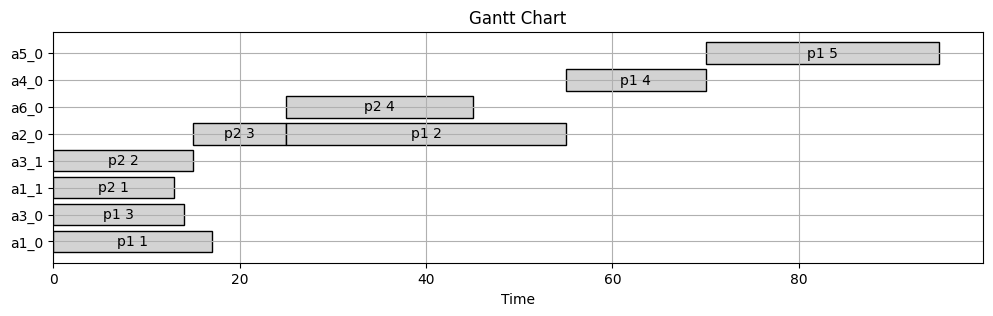

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import math

# Daten in ein DataFrame konvertieren
df = pd.DataFrame([p.to_dict() for p in result_schedule])

size_height = math.ceil(df["machine"].count().itemsize / 3)
# Gantt-Diagramm erstellen
fig, ax = plt.subplots(figsize=(12, size_height))

# Maschinen als y-Werte für die Balken
machines = df['machine'].unique()
machine_to_y = {machine: i for i, machine in enumerate(machines)}

# Iteriere über jede Zeile des DataFrames
for i, row in df.iterrows():
    start = row['start_time']
    duration = row['duration']
    job_id = row['job_id']
    task_id = row['operation_id']
    machine = row['machine']
    label = f'{job_id} {task_id}'

    # Stelle die Aufgabe als Balken im Diagramm dar
    ax.barh(y=machine_to_y[machine], left=start, width=duration, height=0.8, align='center', color='lightgrey', edgecolor='black')
    
    # Text in den Balken einfügen
    ax.text(x=start + duration / 2, y=machine_to_y[machine], s=label, va='center', ha='center', color='black')

# Diagramm formatieren
ax.set_xlabel('Time')
ax.set_yticks(list(machine_to_y.values()))
ax.set_yticklabels(list(machine_to_y.keys()))
ax.set_title('Gantt Chart')

# Grid anzeigen
ax.grid(True)

# Legende entfernen, da sie nicht mehr notwendig ist
# Handles und Labels der Legende deduplizieren
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())

# Diagramm anzeigen
plt.show()
